In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
content = {}

In [3]:
pwd

'/Users/cmh/Desktop/VSCODEPractice /Whale_Resources'

In [4]:
# importing CSV and adding the datetime formatting so that all the dates aline in the master df
whale_csv = pd.read_csv('/Users/cmh/Desktop/VSCODEPractice /Whale_Resources/whale_returns.csv',index_col='Date',infer_datetime_format=True, parse_dates=True)
algo_csv=pd.read_csv('/Users/cmh/Desktop/VSCODEPractice /Whale_Resources/algo_returns.csv',index_col='Date',infer_datetime_format=True, parse_dates=True)
sp500_csv=pd.read_csv('/Users/cmh/Desktop/VSCODEPractice /Whale_Resources/sp500_history.csv',index_col='Date',infer_datetime_format=True, parse_dates=True)

In [5]:
whale_csv.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [6]:
## need to count and drop null values 
whale_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# dropping nulls 
whale_csv.dropna(inplace=True)

In [8]:
# making sure to sort index properly 
whale_csv.sort_index(inplace=True)
whale_csv.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


In [9]:
#counting nulls
algo_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
#dropping nulls 
algo_csv.dropna(inplace=True)

In [11]:
# just double checking that all null values are dropped 
algo_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
algo_csv.sort_index(inplace=True)
algo_csv

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [13]:
#checking sp500 datatypes 
sp500_csv.dtypes

Close    object
dtype: object

In [14]:
# we want the dtypes to match algo_csv so we need make them int 
sp500_csv.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [15]:
sp500_csv['Close']

Date
2019-04-23    $2933.68
2019-04-22    $2907.97
2019-04-18    $2905.03
2019-04-17    $2900.45
2019-04-16    $2907.06
                ...   
2012-10-05    $1460.93
2012-10-04    $1461.40
2012-10-03    $1450.99
2012-10-02    $1445.75
2012-10-01    $1444.49
Name: Close, Length: 1649, dtype: object

In [16]:
# must split close price from $ to be able to convert 
sp500_csv["Close"] = sp500_csv["Close"].str.replace("$","")


In [17]:
# double checking that the $ was dropped 
print(sp500_csv["Close"])

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object


In [18]:
## converting the close column to float
sp500_csv['Close']=sp500_csv['Close'].astype(float)

In [19]:
## checking the dtypes
sp500_csv.dtypes

Close    float64
dtype: object

In [20]:
sp500_csv.sort_index(inplace=True)
sp500_csv.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [21]:
# calculating daily returns 
sp500_csv['sp500'] = sp500_csv['Close'].pct_change()
sp500_csv.head()

,Close,sp500
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


In [22]:
# drop null daily returns
sp500_csv.dropna(inplace=True)
sp500_csv.head()

,Close,sp500
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457


In [23]:
# renaming close 
sp500_csv.rename(columns ={'Close': 'sp500_close'},inplace=True)

In [24]:
# merging all the dataframes
# holds all daily returns 
master_df = pd.concat([whale_csv,algo_csv,sp500_csv],axis=1,ignore_index =False,join='inner',sort= True)
master_df.drop(['sp500_close'],axis=1, inplace=True)
master_df.head(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

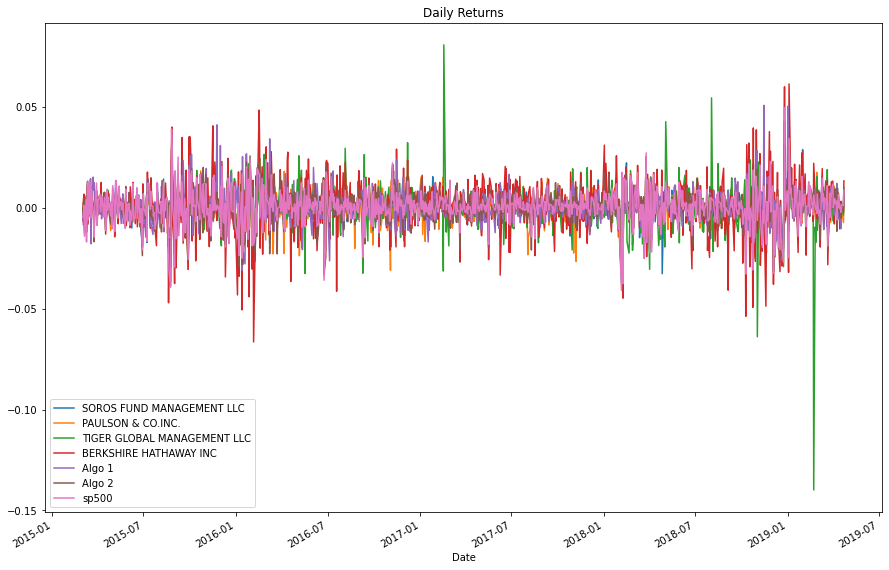

In [25]:
# plotting the daily returns 
# figsize (lenght,width)
master_df.plot(title='Daily Returns',figsize =(15,10))

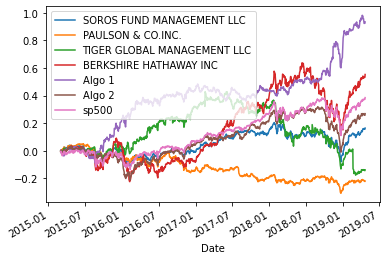

In [26]:
# need to get cumulative returns 
#to display the information, you always need to add(+1) to the df to protect the integrity of the numbers and then always -1 after the cumprod to return the info. back to reset the infomation back to original 'values'
c_returns=((1+master_df).cumprod()-1).plot()

In [27]:
# Does any portfolio outpreform s&p500?
print("Yes, sp500 is out preformed by Algo 1.")

Yes, sp500 is out preformed by Algo 1.


<AxesSubplot:>

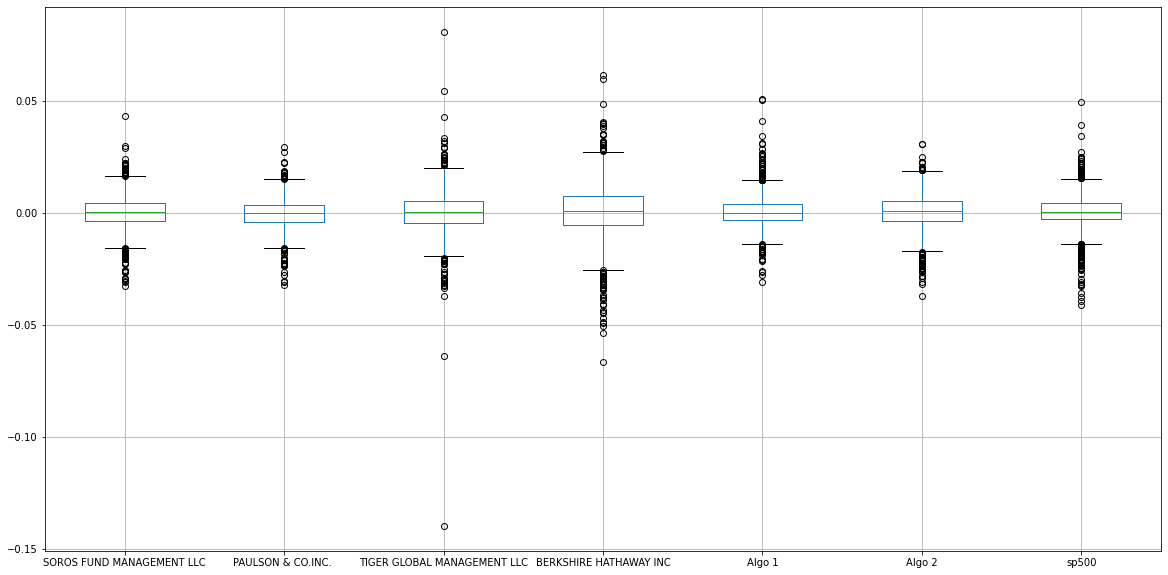

In [28]:
# creating a box plot for each returns 
master_df.boxplot(figsize=(20,10))

In [29]:
# calculate the standard deviation for each portfolio 
# saving the his information to be able to access later 
std_list=master_df.std()
std_list

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

In [30]:
# calculating the riskiest portfolio 
# saving sp500 std as a variable to be able to compare it to the other portfolios in the list 
sp500_std=std_list[6]
sp500_std

0.008553731597758204

In [31]:
# needed to make a list of portfolio names that come from the index because I needed to get the index name from the value 
portfolio_index=std_list.index
#creating a loop to figure out if any portfolio is above the sp500 standard deviation 
for i,j in enumerate (std_list):
    if j > sp500_std:
         print(portfolio_index[i])

TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC


In [32]:
# Were any portfolio risky then the sp500 portfolio?
print(f"Yes {portfolio_index[2]} and {portfolio_index[3]} were riskier than the {portfolio_index[6]} portfolio.")

Yes TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC were riskier than the sp500 portfolio.


In [33]:
# calculating the annualized std 
annual_std=master_df.std()*np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

Rolling Statistics 

In [34]:
# Calculate and plot the rolling std for sp500 over a 21 days
sp500_rolling_std=master_df['sp500'].rolling(21).std()
sp500_rolling_std

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.006498
2019-04-17    0.006537
2019-04-18    0.006470
2019-04-22    0.006094
2019-04-23    0.004325
Name: sp500, Length: 1043, dtype: float64

In [35]:
# Calculating and plot the rolling std of all portfolios over 21 days 
rolling_std=master_df.rolling(21).std()
rolling_std.tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2019-04-09,0.006459,0.005983,0.008014,0.009508,0.005996,0.007355,0.006566
2019-04-10,0.006725,0.006199,0.007978,0.009533,0.006075,0.007559,0.006572
2019-04-11,0.006732,0.006270,0.007757,0.009548,0.005801,0.007583,0.006465
2019-04-12,0.006775,0.006272,0.007568,0.009307,0.005339,0.007479,0.006544
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006517
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094


<AxesSubplot:xlabel='Date'>

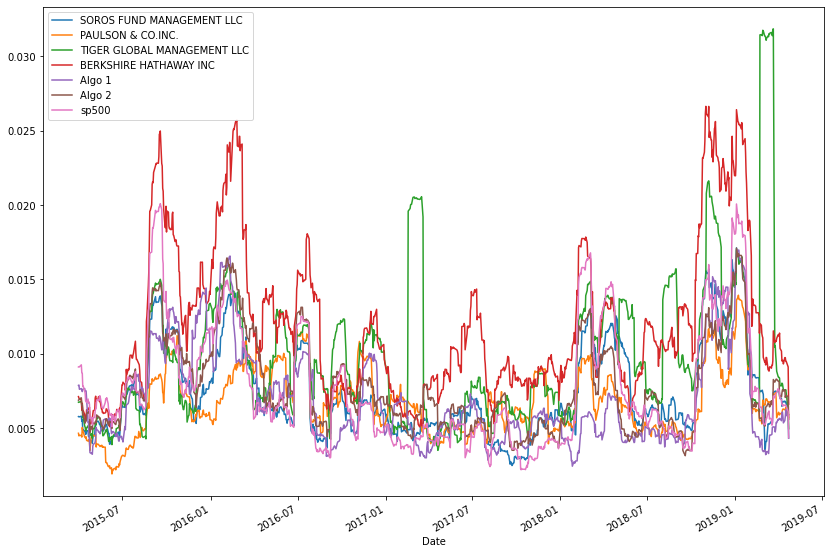

In [36]:
# plotting the rolling 21 day std 
rolling_std.plot(figsize=(14,10))

In [37]:
# calculating the correlation between portfolios 
portfolio_corr= master_df.corr()
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

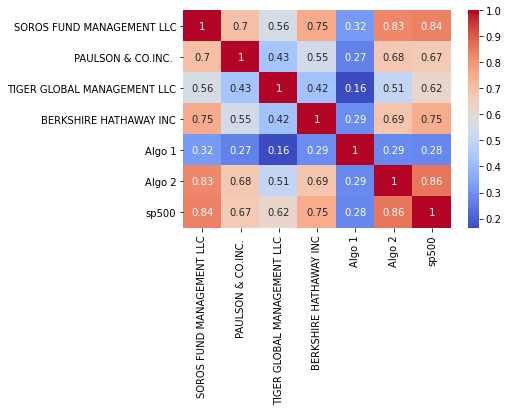

In [38]:
# plotting the correlation of each portfolio using a correlation matrix 
import seaborn as sns

sns.heatmap(portfolio_corr, annot = True, cmap ="coolwarm")

In [39]:
# calculating sp500 against another portfoilo for a 60 day rolling beta 
#beta = covariance/variance 
# must 1st calcualte the covariance and store as variable to be then used later 
algo_covariance=master_df['Algo 2'].cov(master_df['sp500'])

# must calculate the variance and store as variable to use later 
algo_var=master_df['Algo 2'].var()
algo_var

6.959354551789667e-05

In [40]:
# calculating sp500 variance 
sp500_var=master_df['sp500'].var()
sp500_var

7.316632424648712e-05

In [41]:
# calculating beta for algo 2 portfolio 
algo_beta = algo_covariance/algo_var
algo_beta

0.8805317114601035

<AxesSubplot:xlabel='Date'>

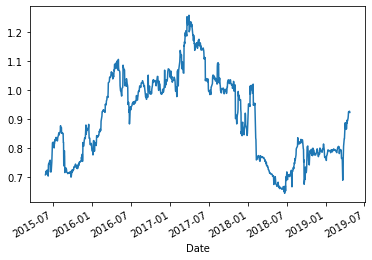

In [42]:
# calculating the rolling beta (60 days) + plot 
rolling_covariance = master_df['Algo 2'].rolling(window = 60).cov(master_df['sp500'])
variance_market = master_df['sp500'].rolling(window = 60).var()
algo_beta = rolling_covariance / variance_market
algo_beta.plot()

<AxesSubplot:title={'center':'60 day Rolling Covariance Algo 2 vs. SP500'}, xlabel='Date'>

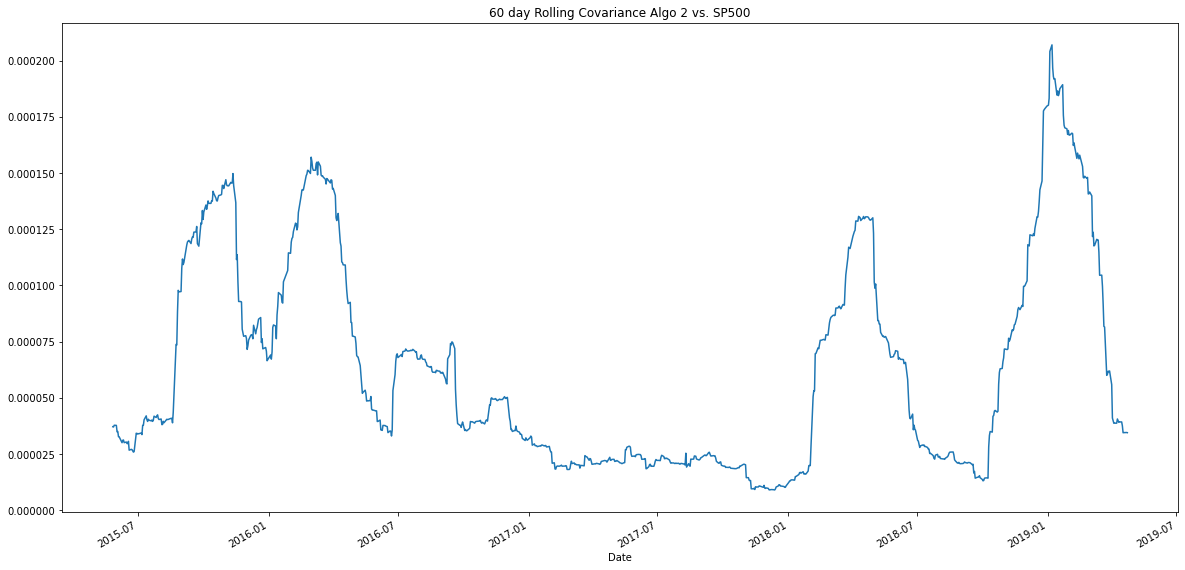

In [43]:
# plotting 'rolling_covariance'
rolling_covariance.plot(figsize=(20,10),title='60 day Rolling Covariance Algo 2 vs. SP500')

# Calculating the exponentially weighted average 

In [44]:
# alternative to calculating the rolling window 
# ewm weights more recent stock prices more heavily 
sp500_ema = master_df['sp500'].ewm(span=21).mean()
sp500_ema

Date
2015-03-03   -0.004539
2015-03-04   -0.004460
2015-03-05   -0.002392
2015-03-06   -0.005771
2015-03-09   -0.003441
                ...   
2019-04-16    0.001544
2019-04-17    0.001197
2019-04-18    0.001232
2019-04-22    0.001212
2019-04-23    0.001905
Name: sp500, Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Exponential weighted average of sp500 portfolio with 21 day half-life'}, xlabel='Date'>

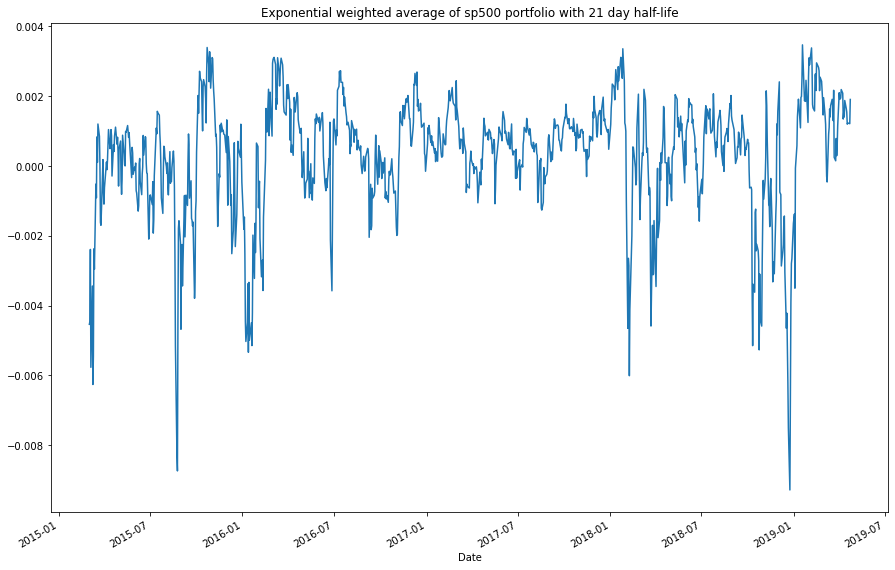

In [45]:
sp500_ema.plot(figsize=(15,10),title ='Exponential weighted average of sp500 portfolio with 21 day half-life')

# Sharpe Ratios 

In [46]:
# calculate and plot sharpe ratios
# calculating risk vs. reward 
sharpe_ratios = ((master_df.mean()*252) - 0.0115)/(master_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.264663
PAULSON & CO.INC.             -0.586720
TIGER GLOBAL MANAGEMENT LLC   -0.187558
BERKSHIRE HATHAWAY INC         0.565734
Algo 1                         1.283581
Algo 2                         0.414525
sp500                          0.563576
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

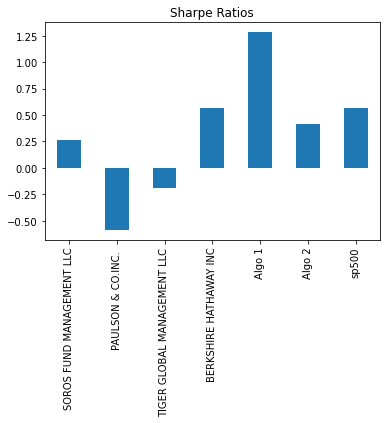

In [47]:
# plotting the information using a bar graph 
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

In [48]:
# determining if algo 1&2 outpreformed sp500 and whale portfolio
# need to calculate each sharpe portfolio seperately 
algo_sharpe =(algo_csv.mean()*252)/(algo_csv.std()*np.sqrt(252))
algo_sharpe

Algo 1    1.300176
Algo 2    0.639258
dtype: float64

In [49]:
#whale portfolio sharpe ratio
whale_sharpe=(whale_csv.mean()*252)/(whale_csv.std()*np.sqrt(252))
whale_sharpe

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64

In [50]:
## cleaning
sp500_csv

,sp500_close,sp500
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [51]:
#sp500 portfolio 
sp500_sharpe=(sp500_csv.mean()*252)/(sp500_csv.std()*np.sqrt(252))
sp500_sharpe

sp500_close    85.115891
sp500           0.906028
dtype: float64

In [52]:
# take an average of all the sharpe ratios to then compare them against eachother to see how they did 
algo_sharpe_mean=algo_sharpe.mean()
whale_sharpe_mean=whale_sharpe.mean()
sp500_sharpe_mean=sp500_sharpe.mean()

In [53]:
# use this info. to compare portfolio avrg. sharpe against one another
algo_sharpe_mean > whale_sharpe_mean

True

In [54]:
algo_sharpe_mean > sp500_sharpe_mean

False

In [55]:
print("Thus, the Algo portfolio did out preform both the sp500 and whale portfolio based on sharpe ratios.")

Thus, the Algo portfolio did out preform both the sp500 and whale portfolio based on sharpe ratios.


Custom Portfolio 

In [56]:
# importing CSV'S
bmw_data=pd.read_csv('BMW_Data.csv',infer_datetime_format=True, parse_dates=True)
nio_data=pd.read_csv('NIO_data.csv',infer_datetime_format=True, parse_dates=True)
tsla_data=pd.read_csv('TSLA_data.csv',infer_datetime_format=True,parse_dates=True)
sp500_data1=pd.read_csv('SP500_CSV.csv',infer_datetime_format=True,parse_dates=True)

In [57]:
#cleaning
bmw_data.rename(columns={'Close':'bmw_close'},inplace = True)
bmw_data.head()

,Date,bmw_close
0,1/13/2020 17:26:00,73.71
1,1/14/2020 17:26:00,73.23
2,1/15/2020 17:26:00,72.19
3,1/16/2020 17:26:00,71.21
4,1/17/2020 17:26:00,71.20


In [58]:
bmw_data['Date']=bmw_data['Date'].str.replace("17:26:00","")

In [59]:
bmw_data.head()

,Date,bmw_close
0,1/13/2020,73.71
1,1/14/2020,73.23
2,1/15/2020,72.19
3,1/16/2020,71.21
4,1/17/2020,71.20


In [60]:
bmw_data.set_index('Date',inplace=True)

In [61]:
nio_data.rename(columns={'Close':'nio_close'},inplace=True)
nio_data['Date']=nio_data['Date'].str.replace("16:00:00","")

In [62]:
nio_data.set_index('Date',inplace=True)

In [63]:
tsla_data.rename(columns={'Close':'tsla_close'},inplace=True)
tsla_data['Date']=tsla_data['Date'].str.replace("16:00:00","")

In [64]:
tsla_data.set_index("Date",inplace=True)

In [65]:
tsla_data.head()

,tsla_close
Date,
1/13/2020,104.97
1/14/2020,107.58
1/15/2020,103.70
1/16/2020,102.70
1/17/2020,102.10


In [66]:
first_2 = pd.merge(bmw_data , nio_data , left_index= True , right_index = True )

In [67]:
stock_df = pd.merge(first_2 , tsla_data, left_index= True , right_index= True)
stock_df.head()

,bmw_close,nio_close,tsla_close
Date,,,
1/13/2020,73.71,3.70,104.97
1/14/2020,73.23,3.76,107.58
1/15/2020,72.19,4.29,103.70
1/16/2020,71.21,4.37,102.70
1/17/2020,71.20,4.67,102.10


In [68]:
stock_df.head()

,bmw_close,nio_close,tsla_close
Date,,,
1/13/2020,73.71,3.70,104.97
1/14/2020,73.23,3.76,107.58
1/15/2020,72.19,4.29,103.70
1/16/2020,71.21,4.37,102.70
1/17/2020,71.20,4.67,102.10


In [69]:
#sp500 cleaning
sp500_data1.head()
sp500_data1.rename(columns={'Close':'sp500_close'},inplace=True)
sp500_data1['Date']=sp500_data1['Date'].str.replace("16:00:00","")


In [70]:
sp500_data1.head()

,Date,sp500_close
0,1/13/2020,3288.13
1,1/14/2020,3283.15
2,1/15/2020,3289.29
3,1/16/2020,3316.81
4,1/17/2020,3329.62


In [71]:
# calculating sp500 daily returns 
sp500_daily_returns=sp500_data1['sp500_close'].pct_change()

In [72]:
# adding daily returns to sp500 df 
sp500_data1['Daily Returns sp500']=sp500_daily_returns

In [73]:
#dropping nulls in sp500
sp500_data1.dropna(inplace=True)

In [74]:
#Calculating daily returns for my portfolio 
stock_daily_returns=stock_df.pct_change()

In [75]:
stock_daily_returns.head()

,bmw_close,nio_close,tsla_close
Date,,,
1/13/2020,NaN,NaN,NaN
1/14/2020,-0.006512,0.016216,0.024864
1/15/2020,-0.014202,0.140957,-0.036066
1/16/2020,-0.013575,0.018648,-0.009643
1/17/2020,-0.000140,0.068650,-0.005842


In [76]:
# dropping null values 
stock_daily_returns.dropna(inplace=True)

In [77]:
# Calculating weighted returns assuming we have equal amount of stocks 
# 1) set weights
weights = [1/3,1/3,1/3]

In [78]:
#calculate portfolio returns 
portfolio_returns = stock_daily_returns.dot(weights)

In [79]:
## displaying sample data 
portfolio_returns

Date
1/14/2020     0.011523
1/15/2020     0.030230
1/16/2020    -0.001523
1/17/2020     0.020889
1/21/2020     0.059980
                ...   
1/6/2021     -0.007454
1/7/2021      0.052281
1/8/2021      0.051996
1/11/2021    -0.010705
1/12/2021     0.017035
Length: 247, dtype: float64

In [80]:
# join portfolio returns as a column in stock_df 
stock_daily_returns['Portfolio Returns']=portfolio_returns

In [81]:
stock_daily_returns.head()

,bmw_close,nio_close,tsla_close,Portfolio Returns
Date,,,,
1/14/2020,-0.006512,0.016216,0.024864,0.011523
1/15/2020,-0.014202,0.140957,-0.036066,0.030230
1/16/2020,-0.013575,0.018648,-0.009643,-0.001523
1/17/2020,-0.000140,0.068650,-0.005842,0.020889
1/21/2020,0.000983,0.107066,0.071890,0.059980


In [82]:
# calculate annualized standard deviation 
annualized_std=stock_daily_returns.std()*np.sqrt(252)
annualized_std

bmw_close            0.440915
nio_close            1.029112
tsla_close           0.915159
Portfolio Returns    0.607345
dtype: float64

<AxesSubplot:xlabel='Date'>

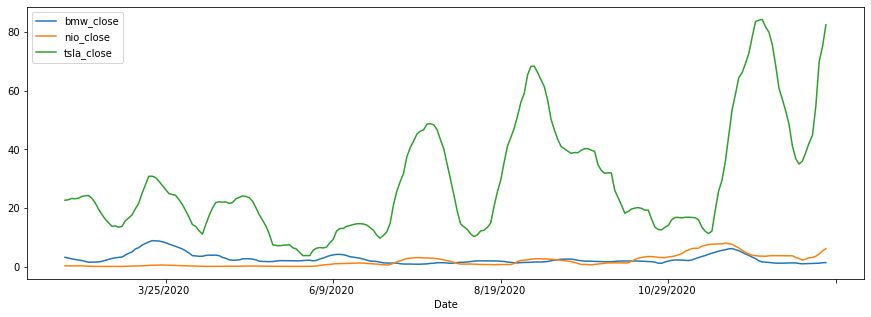

In [83]:
# calculate and plot std over a 21 day period 
stock_df.rolling(window=21).std().plot(figsize=(15,5))

In [84]:
# Calculate and plot correlation 
price_correlation = stock_df.corr()

In [85]:
price_correlation

,bmw_close,nio_close,tsla_close
bmw_close,1.000000,0.709647,0.670049
nio_close,0.709647,1.000000,0.931291
tsla_close,0.670049,0.931291,1.000000


<AxesSubplot:>

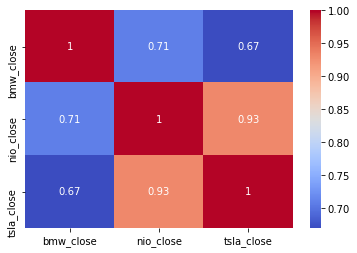

In [86]:
# plotting the correlation matrix
sns.heatmap(price_correlation, annot=True,cmap="coolwarm")

In [87]:
portfolio_returns = pd.DataFrame(stock_daily_returns['Portfolio Returns'])
del sp500_data1['sp500_close']

In [88]:
portfolio_returns.head()

,Portfolio Returns
Date,
1/14/2020,0.011523
1/15/2020,0.030230
1/16/2020,-0.001523
1/17/2020,0.020889
1/21/2020,0.059980


In [89]:
sp500_data1.set_index('Date' , inplace=True)

In [90]:
#referencing 
sp500_data1.head()

,Daily Returns sp500
Date,
1/14/2020,-0.001515
1/15/2020,0.001870
1/16/2020,0.008367
1/17/2020,0.003862
1/21/2020,-0.002652


In [91]:
stock_daily_returns.head()

,bmw_close,nio_close,tsla_close,Portfolio Returns
Date,,,,
1/14/2020,-0.006512,0.016216,0.024864,0.011523
1/15/2020,-0.014202,0.140957,-0.036066,0.030230
1/16/2020,-0.013575,0.018648,-0.009643,-0.001523
1/17/2020,-0.000140,0.068650,-0.005842,0.020889
1/21/2020,0.000983,0.107066,0.071890,0.059980


In [92]:
new_df = pd.DataFrame(stock_daily_returns['Portfolio Returns'])

In [93]:
# merging all info into one df to ensure date is structured exactly the same 
new_df['sp500 Daily Returns']=sp500_data1['Daily Returns sp500']

In [94]:
new_df.head()

,Portfolio Returns,sp500 Daily Returns
Date,,
1/14/2020,0.011523,-0.001515
1/15/2020,0.030230,0.001870
1/16/2020,-0.001523,0.008367
1/17/2020,0.020889,0.003862
1/21/2020,0.059980,-0.002652


In [105]:
# get cov. 
port_cov = new_df['Portfolio Returns'].rolling(window=60).cov(new_df['sp500 Daily Returns'])
# get var. 
var_sp500 = new_df['sp500 Daily Returns'].rolling(window=60).var()
# get beta using above 
port_beta = port_cov / var_sp500

In [106]:
port_beta

Date
1/14/2020          NaN
1/15/2020          NaN
1/16/2020          NaN
1/17/2020          NaN
1/21/2020          NaN
                ...   
1/6/2021      0.892140
1/7/2021      0.953305
1/8/2021      0.993623
1/11/2021     1.032406
1/12/2021     1.068937
Length: 247, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of my portfolio daily returns vs. S&P 500 Returns'}, xlabel='Date'>

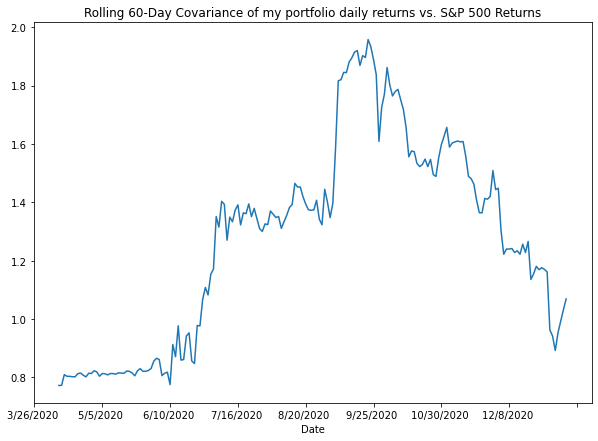

In [107]:
port_beta.plot(figsize=(10,7), title = 'Rolling 60-Day Covariance of my portfolio daily returns vs. S&P 500 Returns')

In [108]:
# calculating annualize sharpe ratios
sharpe_ratios = ((new_df.mean()*252) - 0.0115)/(new_df.std()*np.sqrt(252))

In [109]:
sharpe_ratios

Portfolio Returns      3.277662
sp500 Daily Returns    0.644617
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios: My portfolio vs. sp500'}>

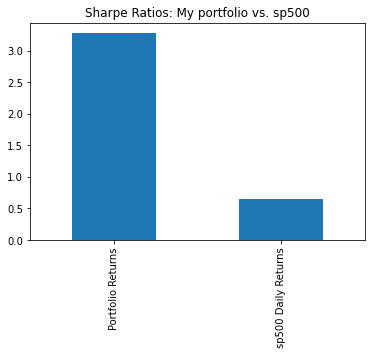

In [114]:
# plotting the sharpe ratios as a bar plot 
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios: My portfolio vs. sp500")

In [1]:
print("My porfolio did better than the S&P 500!")

My porfolio did better than the S&P 500!
